## 实验：图像卷积

### 实验概要

#### 图像卷积

在前面的实验中，我们一直在强调 **卷积核** 的概念。**卷积** 这个词听起来好像数学中的复杂术语，尤其仅几年随着深度学习的流行而成为行业热词的 `卷积神经网络`。另外，可能还会让很多人误解卷积就是把图像花卷一样卷起来。但实际上在前面的图像滤波实验中，你已经用到了卷积技术。另外，PhotoShop 中图像模糊或图像平滑，你曾经用过的美图软件，PPT 里面的图像工具；都用到了卷积。而在 OpenCV 中，卷积可以用作图像模糊、锐化、边缘检测。卷积只是两个矩阵后跟一个和的逐个元素相乘，过程很简单：

1. 取两个矩阵（它们都具有相同的尺寸）
2. 将它们逐个元素相乘（不是点积，而是一个简单的乘法）
3. 将元素加在一起

<img src="./img/1.jpg" width="60%">

因为数字图像只是一个多维矩阵。我们的图像具有宽度（列数）和高度（行数），就像矩阵一样。那么对于一个标准的 RGB 图像，我们的深度 `3` 就分别代表 红，绿，蓝通道的。所以，我们将图像视为一个 **大矩阵**，将 **卷积核** 视为一个用于模糊、锐化、边缘检测和其他图像处理功能的 **微小矩阵**。本质上，这个微小的内核位于大图像的顶部，并从左到右，从上到下滑动，在原始图像的每个 `(x，y)` 坐标上应用数学运算（即：**卷积**） 。

传统图像处理的方法，都是手动定义内核来实现基本的图像处理功能。例如：你在前面的实验中已经熟悉的模糊（平均平滑，高斯平滑，中值平滑等），以及我们在本实验介绍的：边缘检测（拉普拉斯，Sobel，Scharr，Prewitt 等）和锐化，所有这些操作都是手工形式专门设计用于执行特定功能的内核。

#### 卷积的工作原理

我们将图像视为大矩阵（下图灰色矩阵），将内核（卷积核）视为相对于原始的大矩阵图像而言的微小矩阵（下图红色矩阵）：

<img src="./img/2.jpg" width="30%">
<center><i>内核是一个小的矩阵，它从左到右，从上到下滑动到较大的图像上。在输入图像的每个像素处，图像的邻域与内核进行卷积，并存储输出</i></center>

如上图所示，我们沿着原始图像从左到右和从上到下滑动内核。在原始图像的每个 `(x，y)` 坐标处，我们暂停下来，并检查位于图像内核中心的像素附近 。然后，我们采用该像素邻域，将其与内核卷积，并获得单个输出值。然后，将该输出值以与内核中心相同的 `(x，y)` 坐标存储在输出图像中。

让我们首先看一下卷积核的外观：

$$
K=\frac{1}{9}\left[\begin{array}{lll}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{array}\right]
$$

<center><i>一个 3x3 内核，可以使用 OpenCV 和 Python 将其与图像进行卷积</i></center>

上面我们定义了一个正方形的 `3x3` 内核，内核可以是任意大小的 $M×N$ 个像素，前提是二者都应该是奇整数。通常，你会看到的大多数内核实际上都是 $N×N$ 的矩阵。我们使用奇数的内核大小来确保在图像中心有一个有效的整数 `(x，y)` 坐标，譬如：

<img src="./img/4.jpg" width="40%">
<center><i>3x3 内核与一个有效的整数中心 (x, y) 坐标 (左)。一个 2x2 的核，没有一个有效的整数 (x, y) 中心 (右)。</i></center>
    
在图像处理中，卷积需要三个组件：

1. 输入图像
2. 我们将应用于输入图像的内核矩阵
3. 输出图像，用于存储与内核卷积的输入图像的输出
    
卷积本身实际上非常容易。我们需要做的是：
    
1. 从原始图像中选择一个 `(x，y)` 坐标
2. 将内核的中心放置  在此 `(x，y)` 坐标上
3. 对输入图像区域和内核进行逐元素乘法，然后将这些乘法运算的值求和为单个值
4. 这些乘法的总和称为 **内核输出**
5. 使用与步骤 ＃1 相同的 `(x，y)` 坐标 ，但这一次，将内核输出存储在与输出图像相同的 `(x，y)` 位置。

下面的公式演示了如何用一个 `3x3` 内核，对输入图像进行卷积，实现模糊（使用数学符号表示为 `*` 运算符）：

$$
O_{i, j}=\frac{1}{9}\left[\begin{array}{lll}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{array}\right] *\left[\begin{array}{ccc}
197 & 50 & 213 \\
3 & 181 & 203 \\
231 & 2 & 93
\end{array}\right]=\left[\begin{array}{ccc}
1 / 9 \times 197 & 1 / 9 \times 50 & 1 / 9 \times 213 \\
1 / 9 \times 3 & 1 / 9 \times 181 & 1 / 9 \times 203 \\
1 / 9 \times 231 & 1 / 9 \times 2 & 1 / 9 \times 93
\end{array}\right]
$$

有：

$$
O_{i, j}=\sum\left[\begin{array}{ccc}
21 & 5 & 23 \\
0 & 20 & 22 \\
25 & 0 & 10
\end{array}\right]=126
$$
<center><i>卷积运算的输出存储在输出图像中</i></center>

应用此卷积后，我们将位于输出图像 `O` 的坐标 `(i，j)` 的像素设置为：$O_{i,j} = 126$ 。所以，再次强调卷积并不复杂，只是内核（卷积核）与输入图像的内核所覆盖的邻域之间元素级矩阵乘法的总和。

### 实验目标

在本实验中，我们将介绍如何使用 Python 和 OpenCV 实现各种常用卷积，我们将分别通过自定义卷积核与卷积函数，并将结果与直接调用 OpenCV 内置函数 `cv2.filter2D` 的输出结果进行对比，实现相互引证。从而，让你更为清晰的理解 OpenCV 内置函数的工作原理。 为了让你逐步理解各种卷积核的实现效果，我们会使用最简单的编程逻辑，在实验过程中逐步展示实验效果。OpenCV 提供了 `cv2.filter2D` 函数，实现卷积：

```python
dst=cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
```
其中：

- **`src`**：输入图像
- **`dst`**：目标图像，与原图像尺寸和通过数相同
- **`ddepth`**：目标图像的所需深度，选择 `-1` 则与输入图像相同
- **`kernel`**：卷积核（或相当于相关核），单通道浮点矩阵，如果要将不同的内核应用于不同的通道，请使用拆分将图像拆分为单独的颜色平面，然后单独处理它们。所以，在我们的实验中先将图像转换为灰度图片
- **`anchor`**：内核的锚点，指示内核中过滤点的相对位置：锚应位于内核中;默认值（-1，-1）表示锚位于内核中心。
- **`detal`**：在将它们存储在 dst 中之前，将可选值添加到已过滤的像素中，类似于偏置值，就是在完成卷积运算后，再加上一个偏移量。
- **`borderType`**：图像边缘处理方法，在我们前面的实验中已经讨论过

### 1. 导入依赖库

导入所需的依赖库。包括：NumPy 和 OpenCV。

本实验中，我们还需要 scikit-image，另外，还有使图像可以直接在 Jupyter Notebook 中显示的 Matplotlib 库。

In [1]:
# 导入必要的包
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

# 加载 matplotlib.pyplot 进行图像显示
import matplotlib.pyplot as plt                

# 魔法指令，是图像直接嵌入Jupyter Notebook显示
%matplotlib inline

### 2. 加载并显示原始图像

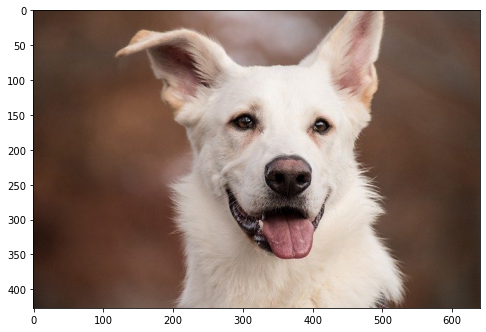

In [3]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab1/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 加载输入图像并将其转换为灰度
img = cv2.imread("./data/schafer.jpg")
# 设置画布尺寸
plt.figure(figsize=(8,10))                        
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

转换为灰度图，在后续的实验中我们将统一对灰度图像，进行卷积运算，正如我们之前讨论的，它实际上是一个名为 `gray` 的大矩阵。

[[49 49 49 ... 77 76 76]
 [49 48 48 ... 76 75 75]
 [49 49 49 ... 75 75 74]
 ...
 [36 36 36 ... 42 43 44]
 [36 36 36 ... 42 43 44]
 [36 36 36 ... 43 44 45]]
[[[49 49 49]
  [49 49 49]
  [49 49 49]
  ...
  [77 77 77]
  [76 76 76]
  [76 76 76]]

 [[49 49 49]
  [48 48 48]
  [48 48 48]
  ...
  [76 76 76]
  [75 75 75]
  [75 75 75]]

 [[49 49 49]
  [49 49 49]
  [49 49 49]
  ...
  [75 75 75]
  [75 75 75]
  [74 74 74]]

 ...

 [[36 36 36]
  [36 36 36]
  [36 36 36]
  ...
  [42 42 42]
  [43 43 43]
  [44 44 44]]

 [[36 36 36]
  [36 36 36]
  [36 36 36]
  ...
  [42 42 42]
  [43 43 43]
  [44 44 44]]

 [[36 36 36]
  [36 36 36]
  [36 36 36]
  ...
  [43 43 43]
  [44 44 44]
  [45 45 45]]]


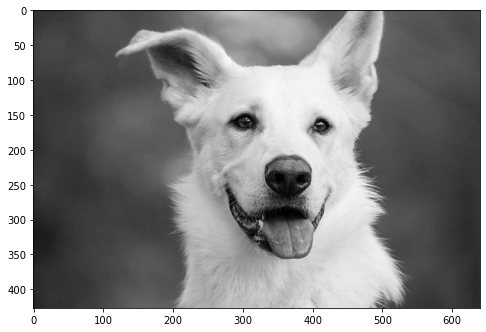

In [8]:
# 转换为灰度图像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)      
# 设置画布尺寸
plt.figure(figsize=(8,10))                        
# 将图像转换为 RGB 模式显示
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) 
print(gray)
# cv2.cvtColor(gray, cv2.COLOR_BGR2RGB) 扩充点 49 ---> [49,49,49]（灰度）
print(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.imshow(gray,"gray")
plt.show()

### 3. 定义卷积函数

我们多花的时间来了解一下自定义的卷积函数，卷积函数需要两个参数：灰度输入图像与卷积核 (kernel)。

首先，需要确定图像与卷积核的空间尺寸（即：宽度和高度）。

```python
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
```

在继续之前，你还必须了解在图像上 **滑动** 的卷积矩阵，然后存储输出矩阵的过程，实际上会减小输出图像的空间尺寸。这主要是因为沿着图像边界上的像素，没有中心像素这样的概念，我们希望我们的输出图像具有与输入图像相同的尺寸。在前面的实验中，我们已经讨论过 OpenCV 是通过填充来解决这个问题的。因此，我们在自定义卷积函数中，使用 **padding** 技术，也就是 **填充**。在这里，我们借助 `copyMakeBorder()` 函数，只是沿图像边界复制像素，使输出图像与输入图像的尺寸匹配。还存在其他填充方法，包括：零填充（用 `0` 填充边界，在构建卷积神经网络时非常常见）和环绕填充（其中边界像素是通过检查图像的另一端确定的）。

```python
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
```
之后，使用卷积核在图像上进行滑动，嵌套两个循环，遍历图片，每次从上到下、从左到右 `1` 个像素滑动内核。

```python
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
```
从中提取图片上与内核滑动到的位置所对应的感兴趣区域（ROI），使用 NumPy 数组切片。

```python
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
```

将 ROI 和 kernel 进行卷积运算，然后对矩阵中的条目求和。

```python
            k = (roi * kernel).sum()
```

输出值 `k`，然后存储在相对于输入图像 `(x，y)` 坐标相同位置的输出数组中。

```python
            output[y - pad, x - pad] = k
```

在处理图像时，我们通常会处理 `[0，255]` 范围内的像素值。但是，在使用卷积时，我们经常会超出此范围。为了将我们输出图片压缩到 `[0，255]` 范围内  ，我们将使用 scikit-image 的 `rescale_intensity` 函数来实现。

In [10]:
def convolve(image, kernel):
    
    # 获取图像的空间尺寸，以及内核的空间维度
    (iH, iW) = image.shape[:2] # 0 1 
    (kH, kW) = kernel.shape[:2] # 0 1 
    
    # 为输出图像分配内存
    # 注意"pad"输入图像的边界
    # 使空间尺寸(即宽度和高度)没有减少
    pad = (kW - 1) // 2 
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    
    # 循环遍历输入图像，
    # 从左到右和从上到下“滑动”内核 (x, y) 坐标 
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            
            # 根据内核中心滑动到的(x, y)坐标提取原图像上的ROI区域
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            
            # 通过在ROI和核之间进行元素相乘来执行实际的卷积
            # 然后对矩阵求和
            k = (roi * kernel).sum()
            
            # 将卷积后的值存储在输出图像的坐标(x,y)中
            output[y - pad, x - pad] = k
    
    # 将输出图像缩放到[0,255]范围内
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    
    # 返回卷积后的输出图像
    return output

其中，OpenCV 的 `copyMakeBorder()` 函数与 scikit-image 的 `rescale_intensity` 函数在这里仅提供了辅助功能，并没有真正影响我们的运算。如果你想详细了解，请查阅官方文档：[rescale_intensity](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity)、
[copyMakeBorder()](https://docs.opencv.org/4.2.0/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36)

### 4. 定义均值滤波卷积核

定义了一个 `7x7` 核和一个 `21x21` 核，用于模糊/平滑图像。内核越大，图像越模糊。你可以看到将内核应用于 ROI 的输出将只是输入区域的平均值。

In [11]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

#### 4.1 调用卷积函数执行轻度模糊

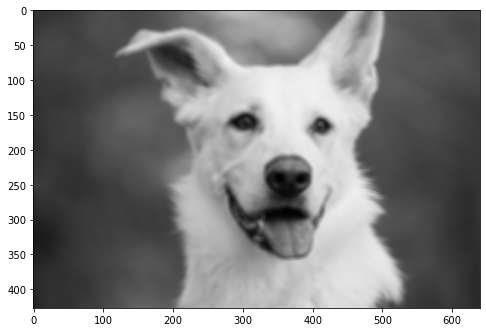

In [12]:
# 调用卷积函数与轻度模糊核
convoleOutput = convolve(gray, smallBlur)                  
# 设置画布尺寸
plt.figure(figsize=(8,10))                                 
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(convoleOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 4.2 调用 OpenCV 函数执行轻度模糊

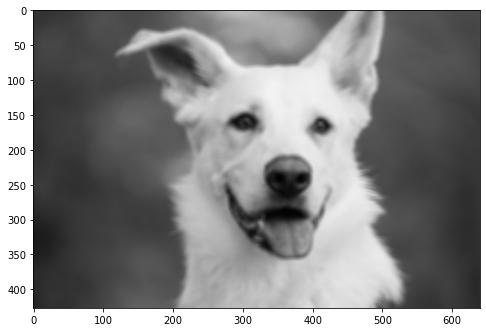

In [15]:
# 调用OpenCV卷积函数
opencvOutput = cv2.filter2D(gray, -1, smallBlur)          
# 设置画布尺寸
plt.figure(figsize=(8,10))                                
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

使用我们的卷积函数应用轻度模糊卷积，然后针对 OpenCV 的 `cv2.filter2D` 函数的结果进行验证。

由于平滑内核的作用，我们的原始图像现在看起来模糊和平滑。

#### 4.3 调用卷积函数函数执行重度模糊

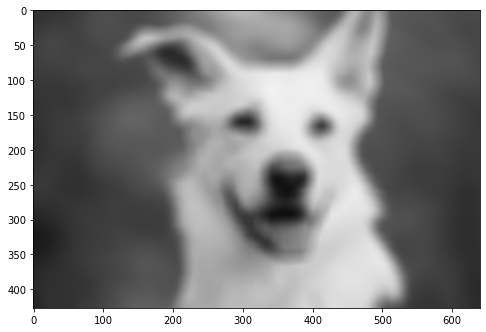

In [14]:
# 调用卷积函数与重度模糊核
convoleOutput = convolve(gray, largeBlur)                  
# 设置画布尺寸
plt.figure(figsize=(8,10))                                 
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(convoleOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 4.4 调用 OpenCV 函数执行重度模糊

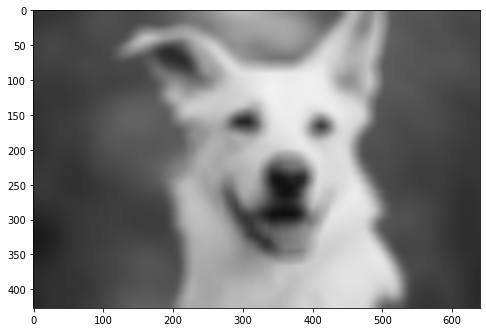

In [9]:
# 调用OpenCV卷积函数
opencvOutput = cv2.filter2D(gray, -1, largeBlur)          
# 设置画布尺寸
plt.figure(figsize=(8,10))                                
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

当我们使用更大的核对图像进行卷积时，图像变得更加模糊请注意，随着平均内核大小的增加，输出图像中的模糊量也随之增加。

### 5. 定义图像锐化卷积核

定义了一个图像锐化内核，用于增强图像的线结构和其他细节，锐化内核强调在相邻的像素值的差异。这使图像看起来更生动。

In [23]:
# 构建一个锐化内核
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")
bruan = np.array((
    [1,-2,3],
    [-2,1,-2],
    [1,-2,3]),dtype="int")

#### 5.1 调用卷积函数执行图像锐化

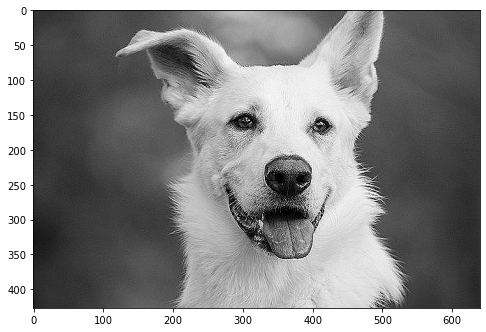

In [25]:
# 调用卷积函数与图像锐化核
convoleOutput = convolve(gray, sharpen)                    
# 设置画布尺寸
plt.figure(figsize=(8,10))                                 
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(convoleOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 5.2 调用 OpenCV 函数执行图像锐化

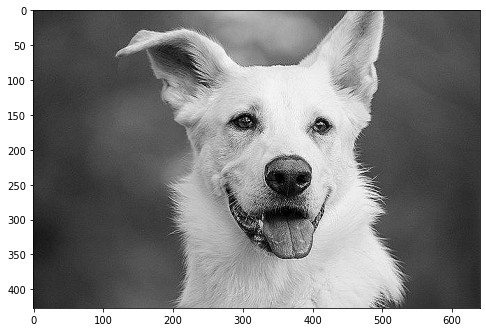

In [12]:
# 调用OpenCV卷积函数
opencvOutput = cv2.filter2D(gray, -1, sharpen)          
# 设置画布尺寸
plt.figure(figsize=(8,10))                              
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

使用锐化内核会增强图像中类似边缘的结构和其他细节。

### 6. 定义拉普拉斯算子模板

拉普拉斯算子是最简单的各向同性微分算子，具有旋转不变性。一个二维图像函数 的拉普拉斯变换是各向同性的二阶导数，定义为：

$$
\nabla^{2} f(x, y)=\frac{\partial^{2} f}{\partial_{x}^{2}}+\frac{\partial^{2} f}{\partial_{y}^{2}}
$$

其中，

$$
\begin{aligned}
&\frac{\partial^{2} f}{\partial x^{2}}=f[x+1, y]-2 f[x, y]+f[x-1, y] \\
&\frac{\partial^{2} f}{\partial y^{2}}=f[x, y+1]-2 f[x, y]+f[x, y-1]
\end{aligned}
$$

为了更适合于数字图像处理，将该方程表示为离散形式： 

$$
\nabla^{2} f=[f(x+1, y)+f(x-1, y)+f(x, y+1)+f(x, y-1)]-4 f(x, y)
$$

另外，拉普拉斯算子还可以表示成模板的形式。从模板形式容易看出，如果在图像中一个较暗的区域中出现了一个亮点，那么用拉普拉斯运算就会使这个亮点变得更亮。因为图像中的边缘就是那些灰度发生跳变的区域，所以拉普拉斯锐化模板在边缘检测中很有用。一般增强技术对于陡峭的边缘和缓慢变化的边缘很难确定其边缘线的位置。但此算子却可用二次微分正峰和负峰之间的过零点来确定，对孤立点或端点更为敏感，因此特别适用于以突出图像中的孤立点、孤立线或线端点为目的的场合。同梯度算子一样，拉普拉斯算子也会增强图像中的噪声，有时用拉普拉斯算子进行边缘检测时，可将图像先进行平滑处理。

In [13]:
# 构造拉普拉斯核用于检测图像的边缘区域
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

#### 6.1  调用卷积函数检测图像边缘

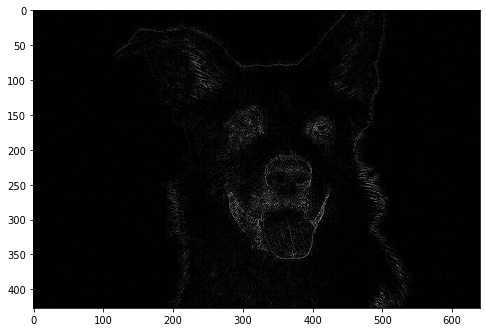

In [14]:
# 调用卷积函数与拉普拉斯算子
convoleOutput = convolve(gray, laplacian)                  
# 设置画布尺寸
plt.figure(figsize=(8,10))                                 
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(convoleOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 6.2  调用 OpenCV 函数检测图像边缘

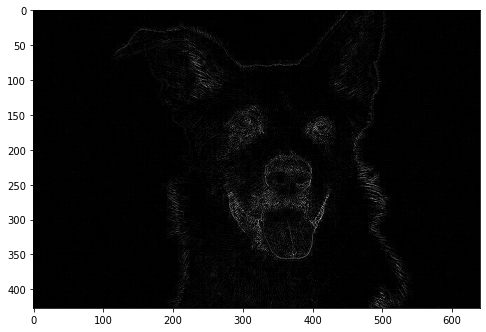

In [15]:
# 调用OpenCV卷积函数
opencvOutput = cv2.filter2D(gray, -1, laplacian)          
# 设置画布尺寸
plt.figure(figsize=(8,10))                                
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

### 7. 定义 sobel 算子

Sobel 算子是一个离散微分算子 (discrete differentiation operator)。 它结合了高斯平滑和微分求导，用来计算图像灰度函数的近似梯度。用于图像处理和计算机视觉，特别是在边缘检测算法中，它可以创建强调边缘的图像。从技术上讲，它是一个离散微分算子，计算图像强度函数梯度的近似值。在图像中的每一点，Sobel 算子的结果是相应的梯度向量或该向量的范数。Sobel 算子基于将图像与水平和垂直方向上的小的可分离的整数值滤波器进行卷积，因此在计算方面相对简便。另一方面，它产生的梯度近似相对粗糙，特别是对于图像中的高频变化。

图像边缘, 边缘就是灰度值变化剧烈的地方。表示这一改变的一个方法是使用导数。是像素值发生跃迁的地方，是图像的显著特征之一，在图像特征提取、对象检测、模式识别等方面都有重要的作用。梯度值的大变预示着图像中内容的显著变化。具体是采用卷积的计算方法实现的。假设被作用的图像为 $I$，在两个方向上求导。

#### 7.1 定义 sobel 算子水平求导

**水平变化求导：** 将 $I$ 与一个奇数大小的内核 $G_{x}$ 进行卷积。比如，当内核大小为 `3x3` 时， $G_{x}$ 的计算结果为：

$$
\mathrm{G}_{\mathrm{x}}=\left[\begin{array}{lll}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{array}\right] * \mathrm{I}
$$

In [16]:
# 构造 Sobel x 轴核
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

#### 7.2 调用卷积函数执行 sobel 算子水平求导

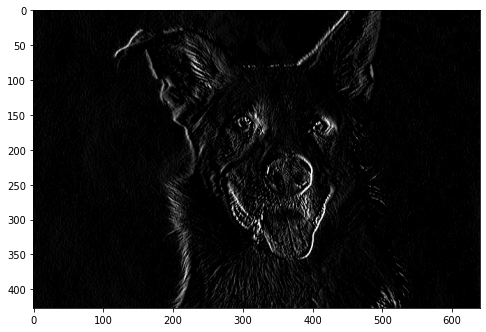

In [17]:
# 调用卷积函数与sobel 算子
convoleOutput = convolve(gray, sobelX)                     
# 设置画布尺寸
plt.figure(figsize=(8,10))                                 
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(convoleOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 7.3 调用 OpenCV 函数执行 sobel 算子水平求导

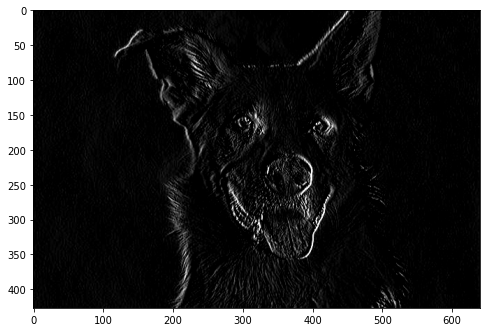

In [18]:
# 调用OpenCV卷积函数
opencvOutput = cv2.filter2D(gray, -1, sobelX)             
# 设置画布尺寸
plt.figure(figsize=(8,10))                                
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 7.4 定义 sobel 算子垂直求导

**垂直变化求导：** 将 $I$ 与一个奇数大小的内核 $G_{y}$ 进行卷积。比如，当内核大小为 `3x3` 时， $G_{y}$ 的计算结果为：

$$
\mathrm{G}_{y}=\left[\begin{array}{ccc}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{array}\right] * \mathrm{I}
$$

In [19]:
# 构造 Sobel y 轴核
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

#### 7.5 调用卷积函数执行 sobel 算子垂直求导

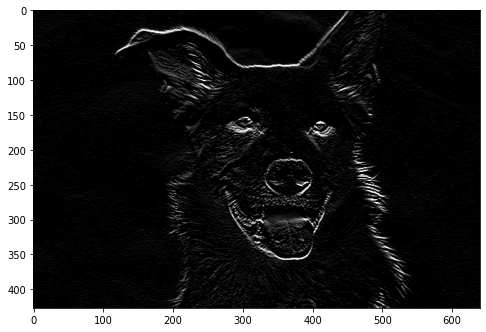

In [20]:
# 调用卷积函数与sobel 算子
convoleOutput = convolve(gray, sobelY)                     
# 设置画布尺寸
plt.figure(figsize=(8,10))                                 
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(convoleOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 7.6 调用 OpenCV 函数执行 sobel 算子垂直求导

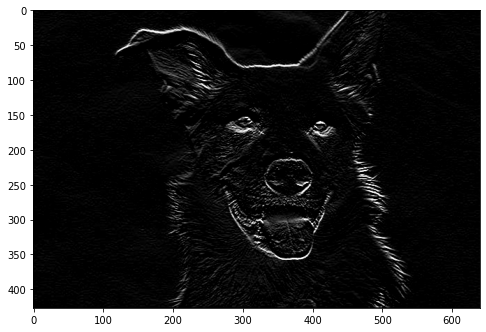

In [21]:
# 调用OpenCV卷积函数
opencvOutput = cv2.filter2D(gray, -1, sobelY)             
# 设置画布尺寸
plt.figure(figsize=(8,10))                                
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

### 8. 定义图像浮雕效果核

通过强调像素的差在给定方向的 Givens 深度的错觉。在这种情况下，沿着从左上到右下的直线的方向。

In [22]:
# 构造浮雕效果核
emboss = np.array((
    [-2, -1, -0],
    [-1, 1, 1],
    [0, 1, 2]), dtype="int")

#### 8.1 调用卷积函数实现浮雕效果

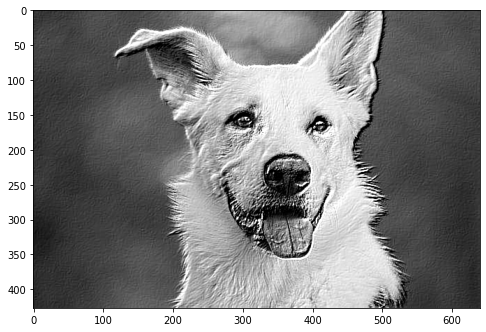

In [23]:
# 调用卷积函数与浮雕效果核
convoleOutput = convolve(gray, emboss)                     
# 设置画布尺寸
plt.figure(figsize=(8,10))                                 
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(convoleOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

#### 8.2 调用 OpenCV 函数实现浮雕效果

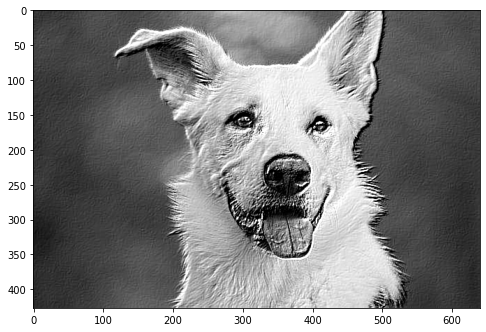

In [24]:
# 调用OpenCV卷积函数
opencvOutput = cv2.filter2D(gray, -1, emboss)             
# 设置画布尺寸
plt.figure(figsize=(8,10))                                
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB)) 
plt.show()

### 实验小结

在本实验中，你了解了图像卷积的基本原理与运算过程，分别通过自定义卷积核与卷积函数，并将结果与直接调用 OpenCV 内置函数 `cv2.filter2D` 的输出结果进行对比，实现相互引证。同时，你分别采用了轻度模糊、重度模糊、图像锐化、拉普拉斯算子模板、 sobel 算子、浮雕效果模板作为 **卷积核** 对图像执行卷积运算。你可能会有兴趣了解这些模板的定义方法以及更多的面向图像处理的 **卷积核** 模板，你可以访问[这个网站](https://setosa.io/ev/image-kernels/)，通过生动的交互式操作选取更多有趣的 **卷积核** 并应用到我们上面的代码中。

<img src="./img/kernel.jpg" width="80%">

最后，值得一提的是，严格而言，OpenCV 的 `cv2.filter2D` 函数实际上计算相关性，而不是真正的卷积：

$$
\operatorname{dst}(x, y)=\sum_{0 \leq x^{\prime}<\text { kerne1. cols, } \atop 0 \leq y^{\prime}<\text { kernel.rows }} \operatorname{kernel}\left(x^{\prime}, y^{\prime}\right) * \operatorname{src}\left(x+x^{\prime}-\text { anchor. } \mathbf{x}, y+y^{\prime}-\text { anchor. } \mathrm{y}\right)
$$

如果你想了解如何在 OpenCV 中实现真正的卷积，可以参考[官方文档](https://www.docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)